In [3]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


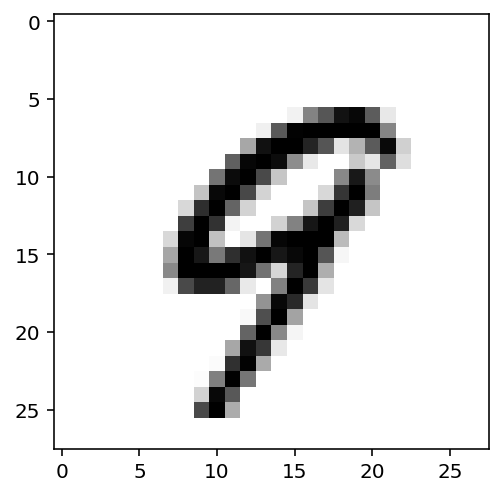

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

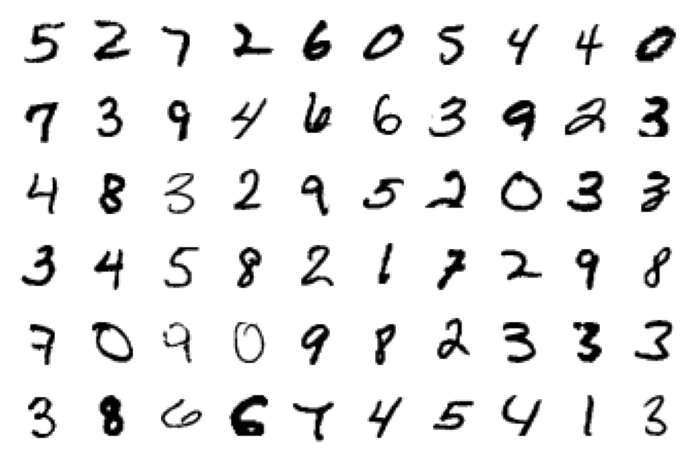

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [13]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [14]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0043,  0.0043,  0.0043,  ...,  0.0043,  0.0043,  0.0043],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        ...,
        [-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035],
        [ 0.0031,  0.0031,  0.0031,  ...,  0.0031,  0.0031,  0.0031],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006]],
       device='cuda:0')


In [15]:

from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [16]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 1.5624e-03,  2.2540e-02, -1.7504e-02,  ...,  2.3743e-02,
         -3.2048e-02,  8.8791e-03],
        [-9.5227e-03, -2.4170e-02, -1.1289e-02,  ..., -1.8649e-02,
         -2.0202e-02,  1.8797e-03],
        [ 1.2158e-02, -3.4038e-02,  1.7545e-02,  ..., -2.2976e-02,
         -1.3022e-02, -2.5500e-02],
        ...,
        [-1.5660e-02, -1.4854e-02,  1.5841e-02,  ...,  3.1578e-02,
          1.0267e-02, -1.9766e-05],
        [-7.8909e-04, -2.0517e-02,  1.1654e-02,  ..., -2.3705e-02,
         -5.8027e-03, -2.1840e-02],
        [-2.2184e-02,  2.7468e-02, -5.3278e-03,  ...,  1.4402e-02,
         -3.1286e-02,  3.6580e-03]], device='cuda:0', requires_grad=True)
Gradient - tensor([[ 0.0043,  0.0043,  0.0043,  ...,  0.0043,  0.0043,  0.0043],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        ...,
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.00

In [17]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 1.5189e-03,  2.2496e-02, -1.7548e-02,  ...,  2.3699e-02,
         -3.2091e-02,  8.8357e-03],
        [-9.5257e-03, -2.4173e-02, -1.1292e-02,  ..., -1.8652e-02,
         -2.0205e-02,  1.8767e-03],
        [ 1.2175e-02, -3.4021e-02,  1.7562e-02,  ..., -2.2959e-02,
         -1.3005e-02, -2.5483e-02],
        ...,
        [-1.5635e-02, -1.4829e-02,  1.5866e-02,  ...,  3.1603e-02,
          1.0292e-02,  5.2530e-06],
        [-7.7470e-04, -2.0502e-02,  1.1669e-02,  ..., -2.3690e-02,
         -5.7883e-03, -2.1826e-02],
        [-2.2215e-02,  2.7436e-02, -5.3591e-03,  ...,  1.4370e-02,
         -3.1318e-02,  3.6267e-03]], device='cuda:0', requires_grad=True)


In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6491201410272609
Epoch 1 - Training loss: 0.2901515983489912
Epoch 2 - Training loss: 0.2240326358938713
Epoch 3 - Training loss: 0.17602494507154295
Epoch 4 - Training loss: 0.1439767598228128
Epoch 5 - Training loss: 0.12328245143976006
Epoch 6 - Training loss: 0.10779627322602564
Epoch 7 - Training loss: 0.09407350862386829
Epoch 8 - Training loss: 0.08465117717813105
Epoch 9 - Training loss: 0.0769235029829535
Epoch 10 - Training loss: 0.06970226955907877
Epoch 11 - Training loss: 0.06356857334951689
Epoch 12 - Training loss: 0.05857046768401882
Epoch 13 - Training loss: 0.0534953538915202
Epoch 14 - Training loss: 0.05020805089267841

Training Time (in minutes) = 1.7770875414212546


In [19]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 1


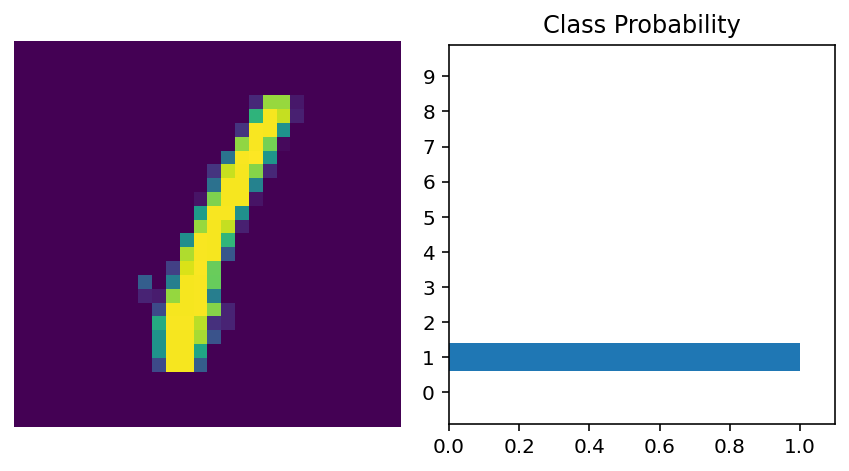

In [20]:

images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [21]:
correct_count, all_count = 0, 0
for images,labels in valloader:
 for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9776
